# Problem Statement

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Importing libs

In [52]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from sklearn.utils import shuffle

# Reading input data 

In [4]:
data_dir_train = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Prepare the dataset

In [35]:
# batch_size = 32
# img_height = 180
# img_width = 180
# rnd_seed = 123
# random.seed(rnd_seed)

In [36]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [37]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


In [38]:
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_test,
#   validation_split=0.9,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [39]:
# class_names = train_ds.class_names
# print(class_names)

In [41]:
X = []
Y = []
image_size = 128

In [ ]:
train_path = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
labels = os.listdir(train_path)

In [68]:
train_path = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [43]:
labels = os.listdir(train_path)
labels

['pigmented benign keratosis',
 'melanoma',
 'vascular lesion',
 'actinic keratosis',
 'squamous cell carcinoma',
 'basal cell carcinoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'nevus']

In [46]:
# train
X_train_list = []
Y_train_list = []
for i in labels:
    targetPath = os.path.join(train_path,i)

    for j in os.listdir(targetPath):
        img = cv2.imread(os.path.join(targetPath,j))
        img = cv2.resize(img,(image_size,image_size))
        
        X_train_list.append(img)
        Y_train_list.append(i)


In [ ]:
X_train = X_train_list
y_train = Y_train_list

In [ ]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)  

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
test_path = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [80]:
# test
X_test_list = []
Y_test_list = []
for i in labels:
    targetPath = os.path.join(test_path,i)

    for j in os.listdir(targetPath):
        img = cv2.imread(os.path.join(targetPath,j))
        img = cv2.resize(img,(image_size,image_size))
        
        X_test_list.append(img)
        Y_test_list.append(i)  

In [81]:
X_test = X_test_list
y_test = Y_test_list

In [82]:
X_test = np.array(X_test)/255
y_test = np.array(y_test)  

In [83]:
print(X_test.shape)
print(y_test.shape)

(118, 128, 128, 3)
(118,)


In [58]:
X_train,y_train = shuffle(X_train,y_train,random_state=101)

In [59]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new

In [60]:
# Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [61]:
print(X_train.shape)
print(y_train.shape)


(2239, 128, 128, 3)
(2239, 9)


In [ ]:
X_test,y_test = shuffle(X_test,y_test,random_state=101)

In [84]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new

In [86]:
# Encoding
from keras.utils import to_categorical
y_test = to_categorical(y_test)

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(image_size, 
                                                              image_size,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)


In [63]:
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# DenseNet121
model = Sequential(data_augmentation)
model.add(DenseNet121(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [67]:
epochs = 20
history = model.fit(x=X_train,
                    y=y_train,
                    validation_split=0.1,
                    epochs=epochs
)

Epoch 1/20
63/63 [==============================] - 92s 336ms/step - loss: 4.4034 - accuracy: 0.3653 - val_loss: 3.6228 - val_accuracy: 0.1830
Epoch 2/20
63/63 [==============================] - 16s 256ms/step - loss: 1.4155 - accuracy: 0.4998 - val_loss: 2.0647 - val_accuracy: 0.2589
Epoch 3/20
63/63 [==============================] - 17s 263ms/step - loss: 1.2979 - accuracy: 0.5529 - val_loss: 1.9670 - val_accuracy: 0.4330
Epoch 4/20
63/63 [==============================] - 16s 258ms/step - loss: 1.2012 - accuracy: 0.5851 - val_loss: 1.5407 - val_accuracy: 0.4911
Epoch 5/20
63/63 [==============================] - 17s 264ms/step - loss: 1.1073 - accuracy: 0.6169 - val_loss: 1.2815 - val_accuracy: 0.5759
Epoch 6/20
63/63 [==============================] - 16s 255ms/step - loss: 1.1185 - accuracy: 0.6129 - val_loss: 1.4156 - val_accuracy: 0.5446
Epoch 7/20
63/63 [==============================] - 17s 266ms/step - loss: 1.1383 - accuracy: 0.5990 - val_loss: 29.6977 - val_accuracy: 0.196

In [87]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

4/4 [==============================] - 3s 357ms/step - loss: 2.7559 - accuracy: 0.3983
Test Loss is 2.7559261322021484
Test Accuracy is 0.39830508828163147


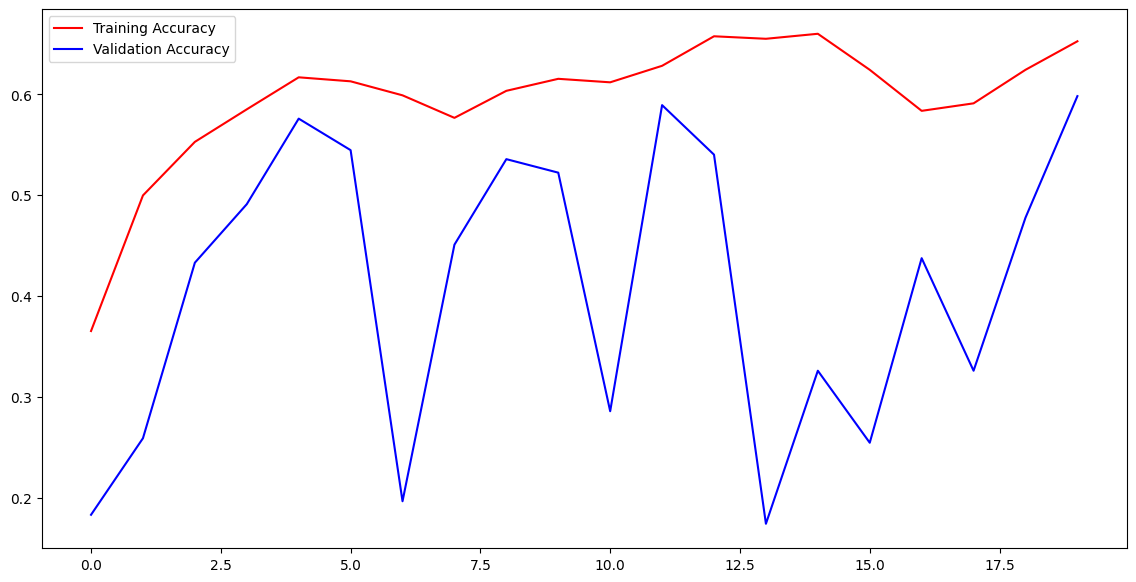

In [88]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

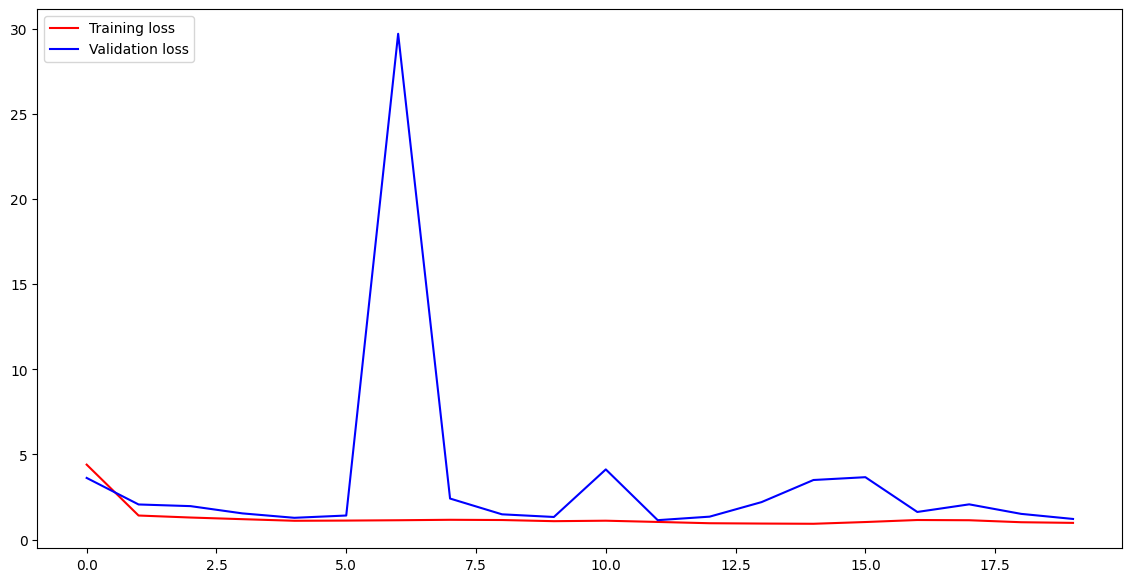

In [89]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()